# Homework 5


Apply the EDA techniques we learnt today to `flights` dataset and write a short report.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/msaricaumbc/DS_data/master/nyc_flights.csv'
flights = pd.read_csv(url)


In [2]:
flights

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2013      1    1     517.0             515        2.0     830.0   
1       2013      1    1     533.0             529        4.0     850.0   
2       2013      1    1     542.0             540        2.0     923.0   
3       2013      1    1     544.0             545       -1.0    1004.0   
4       2013      1    1     554.0             600       -6.0     812.0   
...      ...    ...  ...       ...             ...        ...       ...   
336771  2013      9   30       NaN            1455        NaN       NaN   
336772  2013      9   30       NaN            2200        NaN       NaN   
336773  2013      9   30       NaN            1210        NaN       NaN   
336774  2013      9   30       NaN            1159        NaN       NaN   
336775  2013      9   30       NaN             840        NaN       NaN   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0                  819       11.0      UA    1545  N14228    EWR  IAH   
1                  830       20.0      UA    1714  N24211    LGA  IAH   
2                  850       33.0      AA    1141  N619AA    JFK  MIA   
3                 1022      -18.0      B6     725  N804JB    JFK  BQN   
4                  837      -25.0      DL     461  N668DN    LGA  ATL   
...                ...        ...     ...     ...     ...    ...  ...   
336771            1634        NaN      9E    3393     NaN    JFK  DCA   
336772            2312        NaN      9E    3525     NaN    LGA  SYR   
336773            1330        NaN      MQ    3461  N535MQ    LGA  BNA   
336774            1344        NaN      MQ    3572  N511MQ    LGA  CLE   
336775            1020        NaN      MQ    3531  N839MQ    LGA  RDU   

        air_time  distance  hour  minute             time_hour  
0          227.0      1400     5      15  2013-01-01T10:00:00Z  
1          227.0      1416     5      29  2013-01-01T10:00:00Z  
2          160.0      1089     5      40  2013-01-01T10:00:00Z  
3          183.0      1576     5      45  2013-01-01T10:00:00Z  
4          116.0       762     6       0  2013-01-01T11:00:00Z  
...          ...       ...   ...     ...                   ...  
336771       NaN       213    14      55  2013-09-30T18:00:00Z  
336772       NaN       198    22       0  2013-10-01T02:00:00Z  
336773       NaN       764    12      10  2013-09-30T16:00:00Z  
336774       NaN       419    11      59  2013-09-30T15:00:00Z  
336775       NaN       431     8      40  2013-09-30T12:00:00Z  

[336776 rows x 19 columns]

In [3]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [5]:
flights.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

<AxesSubplot:>

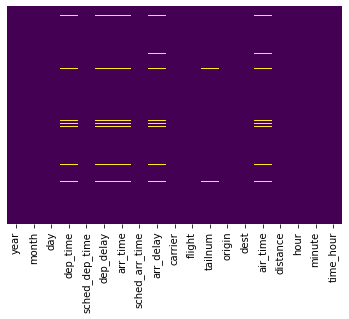

In [6]:
sns.heatmap(flights.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

###### Checking if any column contains only null values

In [7]:
flights.isnull().sum()==flights.shape[0]

year              False
month             False
day               False
dep_time          False
sched_dep_time    False
dep_delay         False
arr_time          False
sched_arr_time    False
arr_delay         False
carrier           False
flight            False
tailnum           False
origin            False
dest              False
air_time          False
distance          False
hour              False
minute            False
time_hour         False
dtype: bool

###### Percentage of null values to the no. of rows

In [8]:
(flights.isnull().sum()/len(flights)).sort_values(ascending= False)

arr_delay         0.028001
air_time          0.028001
arr_time          0.025872
dep_time          0.024512
dep_delay         0.024512
tailnum           0.007459
year              0.000000
origin            0.000000
minute            0.000000
hour              0.000000
distance          0.000000
dest              0.000000
carrier           0.000000
flight            0.000000
month             0.000000
sched_arr_time    0.000000
sched_dep_time    0.000000
day               0.000000
time_hour         0.000000
dtype: float64

In [9]:
flights.shape

(336776, 19)

In [10]:
flights.dropna(how='all', axis=0, inplace= True)
flights.dropna(how='all', axis=1, inplace= True)

In [11]:
flights.shape

(336776, 19)

###### If any column is filled with same value in each row then drop it

In [12]:
for this_col in flights.columns:
    if(flights[this_col].nunique()==1):
        flights.drop([this_col], axis=1, inplace=True)

In [13]:
flights.shape   # year column dropped

(336776, 18)

In [14]:
def uniq_per_col(df,count):
    for this_col in df.columns:
        print("====  ",this_col,"has",df[this_col].nunique(),"unique entries ====")
        print(df[this_col].value_counts().head(count))

In [15]:
uniq_per_col(flights, 5)

====   month has 12 unique entries ====
7     29425
8     29327
10    28889
3     28834
5     28796
Name: month, dtype: int64
====   day has 31 unique entries ====
18    11399
11    11359
22    11345
15    11317
8     11271
Name: day, dtype: int64
====   dep_time has 1318 unique entries ====
555.0    834
755.0    820
556.0    818
557.0    799
655.0    798
Name: dep_time, dtype: int64
====   sched_dep_time has 1021 unique entries ====
600     7016
700     4900
630     4770
900     4766
1200    4624
Name: sched_dep_time, dtype: int64
====   dep_delay has 527 unique entries ====
-5.0    24821
-4.0    24619
-3.0    24218
-2.0    21516
-6.0    20701
Name: dep_delay, dtype: int64
====   arr_time has 1411 unique entries ====
1008.0    485
1013.0    484
1015.0    479
1012.0    464
1005.0    460
Name: arr_time, dtype: int64
====   sched_arr_time has 1163 unique entries ====
1025    1324
2015    1234
1110    1198
1115    1193
1235    1133
Name: sched_arr_time, dtype: int64
====   arr_delay has 5

# EDA

In [16]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           336776 non-null  int64  
 1   day             336776 non-null  int64  
 2   dep_time        328521 non-null  float64
 3   sched_dep_time  336776 non-null  int64  
 4   dep_delay       328521 non-null  float64
 5   arr_time        328063 non-null  float64
 6   sched_arr_time  336776 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         336776 non-null  object 
 9   flight          336776 non-null  int64  
 10  tailnum         334264 non-null  object 
 11  origin          336776 non-null  object 
 12  dest            336776 non-null  object 
 13  air_time        327346 non-null  float64
 14  distance        336776 non-null  int64  
 15  hour            336776 non-null  int64  
 16  minute          336776 non-null  int64  
 17  time_hour 

In [17]:
flights['carrier'] = flights['carrier'].astype('category')

In [18]:
flights['carrier'].dtype

CategoricalDtype(categories=['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
                  'OO', 'UA', 'US', 'VX', 'WN', 'YV'],
, ordered=False)

In [19]:
flights['origin'] = flights['origin'].astype('category')

In [20]:
flights['origin'].dtype

CategoricalDtype(categories=['EWR', 'JFK', 'LGA'], ordered=False)

In [21]:
flights['dest'] = flights['dest'].astype('category')

In [22]:
flights['dest'].dtype

CategoricalDtype(categories=['ABQ', 'ACK', 'ALB', 'ANC', 'ATL', 'AUS', 'AVL', 'BDL',
                  'BGR', 'BHM',
                  ...
                  'SNA', 'SRQ', 'STL', 'STT', 'SYR', 'TPA', 'TUL', 'TVC',
                  'TYS', 'XNA'],
, ordered=False)

## Univariate Analysis

In [23]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   month           336776 non-null  int64   
 1   day             336776 non-null  int64   
 2   dep_time        328521 non-null  float64 
 3   sched_dep_time  336776 non-null  int64   
 4   dep_delay       328521 non-null  float64 
 5   arr_time        328063 non-null  float64 
 6   sched_arr_time  336776 non-null  int64   
 7   arr_delay       327346 non-null  float64 
 8   carrier         336776 non-null  category
 9   flight          336776 non-null  int64   
 10  tailnum         334264 non-null  object  
 11  origin          336776 non-null  category
 12  dest            336776 non-null  category
 13  air_time        327346 non-null  float64 
 14  distance        336776 non-null  int64   
 15  hour            336776 non-null  int64   
 16  minute          336776 non-null  int64

### Categorical Variables

In [24]:
# count of flights from each origin

origin = flights.origin.value_counts()
origin

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

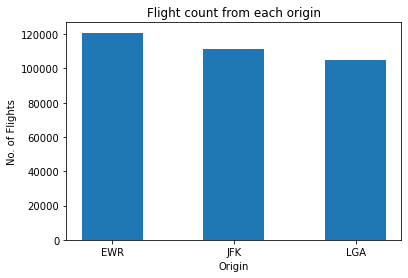

In [25]:
plt.bar(x= origin.index, height = origin.values, width=0.5)
plt.xlabel('Origin')
plt.ylabel('No. of Flights')
plt.title('Flight count from each origin')
plt.show()

In [26]:
carrier = flights.carrier.value_counts()
carrier

UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: carrier, dtype: int64

Text(0.5, 1.0, 'No. of Flights from each carrier')

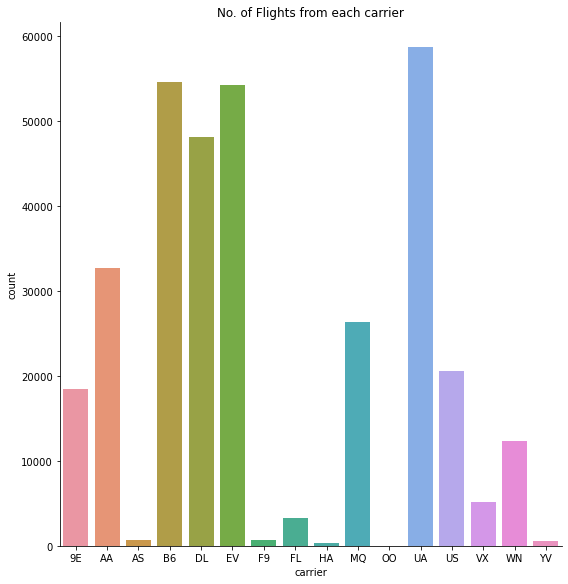

In [27]:
plot = sns.catplot(data=flights, kind='count', x='carrier', aspect=1, height= 8)
plot.ax.set_title('No. of Flights from each carrier')

### Continuous Variables

In [28]:
arr = flights['sched_arr_time'].value_counts()
arr

1025    1324
2015    1234
1110    1198
1115    1193
1235    1133
        ... 
47         1
147        1
115        1
158        1
125        1
Name: sched_arr_time, Length: 1163, dtype: int64

##### Distribution for Scheduled arrival time to know what time is busiest

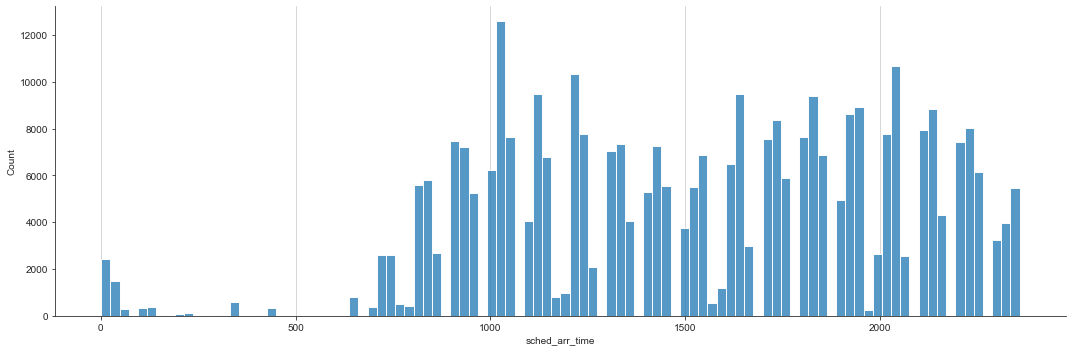

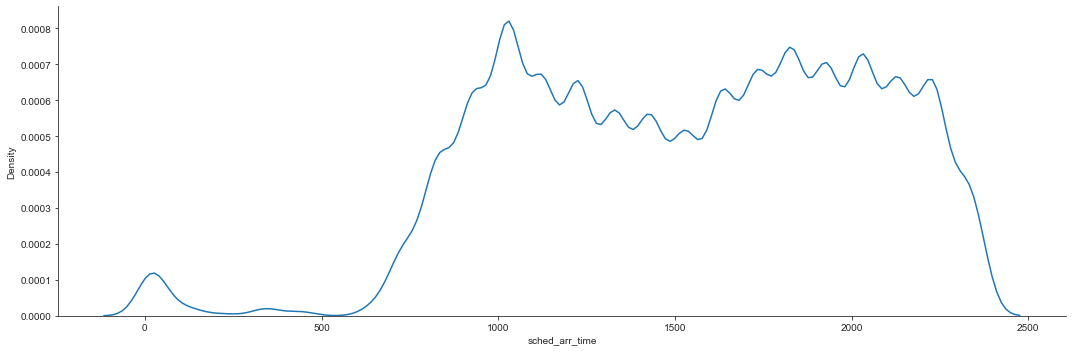

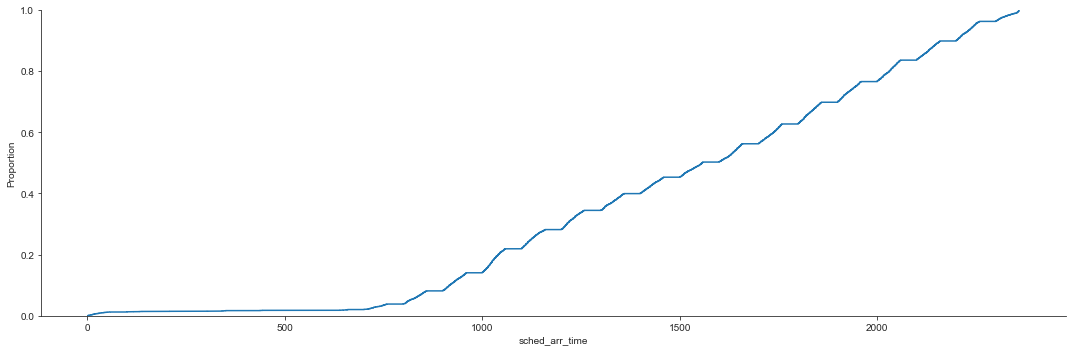

In [29]:
sns.set_style('ticks')

## we can use displot to see the distribution of 'sched_arr_time' column.
plot = sns.displot(data = flights, x= 'sched_arr_time', kind = 'hist', height=5 ,aspect=3)
plot.ax.grid(axis = 'x')

## or we can just take a look at the densities
plot = sns.displot(data = flights, x= 'sched_arr_time', kind = 'kde', height= 5, aspect = 3)

## or we can just take a look at the proportions
plot = sns.displot(data = flights, x= 'sched_arr_time', kind = 'ecdf', height= 5, aspect = 3)


##### Distribution for Scheduled Departure time to know When most of the the flights are scheduled to fly

In [30]:
dep = flights['sched_dep_time'].value_counts()
dep

600     7016
700     4900
630     4770
900     4766
1200    4624
        ... 
501        1
2345       1
527        1
2315       1
2208       1
Name: sched_dep_time, Length: 1021, dtype: int64

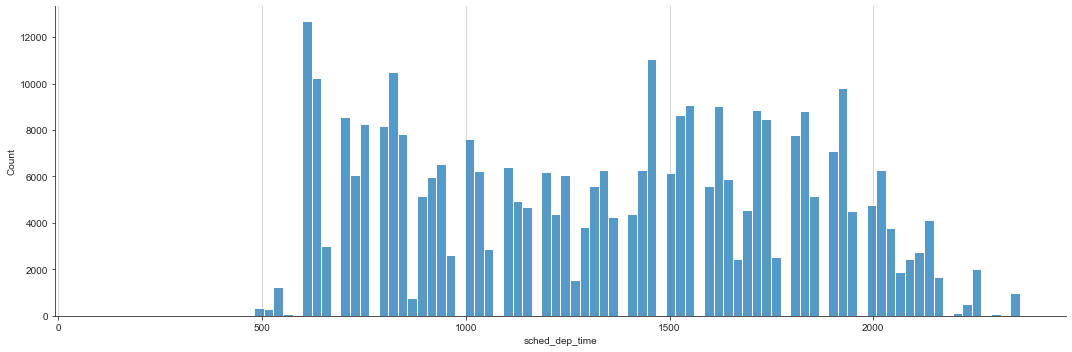

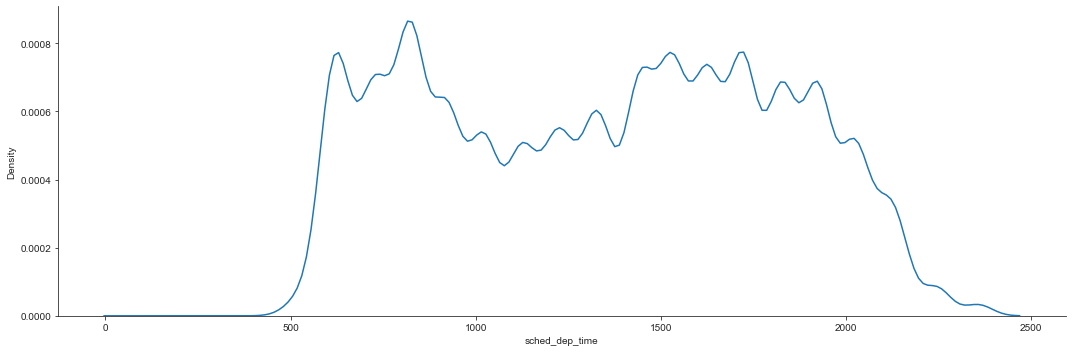

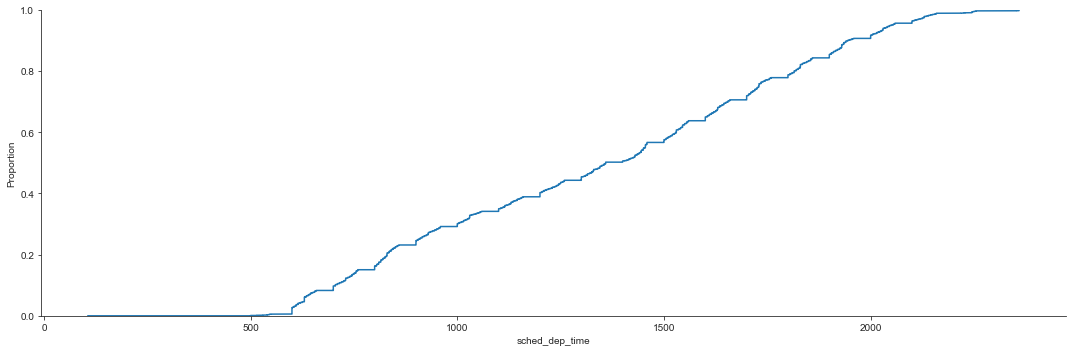

In [31]:
sns.set_style('ticks')

## we can use displot to see the distribution of 'sched_dep_time' column.
plot = sns.displot(data = flights, x= 'sched_dep_time', kind = 'hist', height=5 ,aspect=3)
plot.ax.grid(axis = 'x')

## or we can just take a look at the densities
plot = sns.displot(data = flights, x= 'sched_dep_time', kind = 'kde', height= 5, aspect = 3)

## or we can just take a look at the proportions
plot = sns.displot(data = flights, x= 'sched_dep_time', kind = 'ecdf', height= 5, aspect = 3)


## Multivariate Analysis

### Categorical Variables vs Categorical Variables

###### Checking which carriers operate on each origin airports

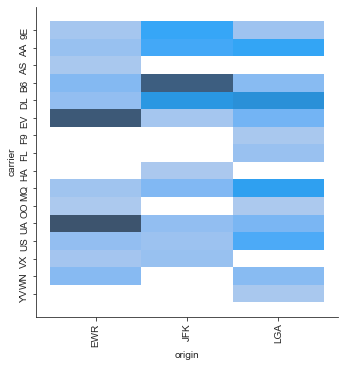

In [32]:
plot = sns.displot(flights, x="origin", y="carrier", cbar = False)
plot.ax.tick_params(labelrotation = 90)

###### To Find destination airports for each carrier

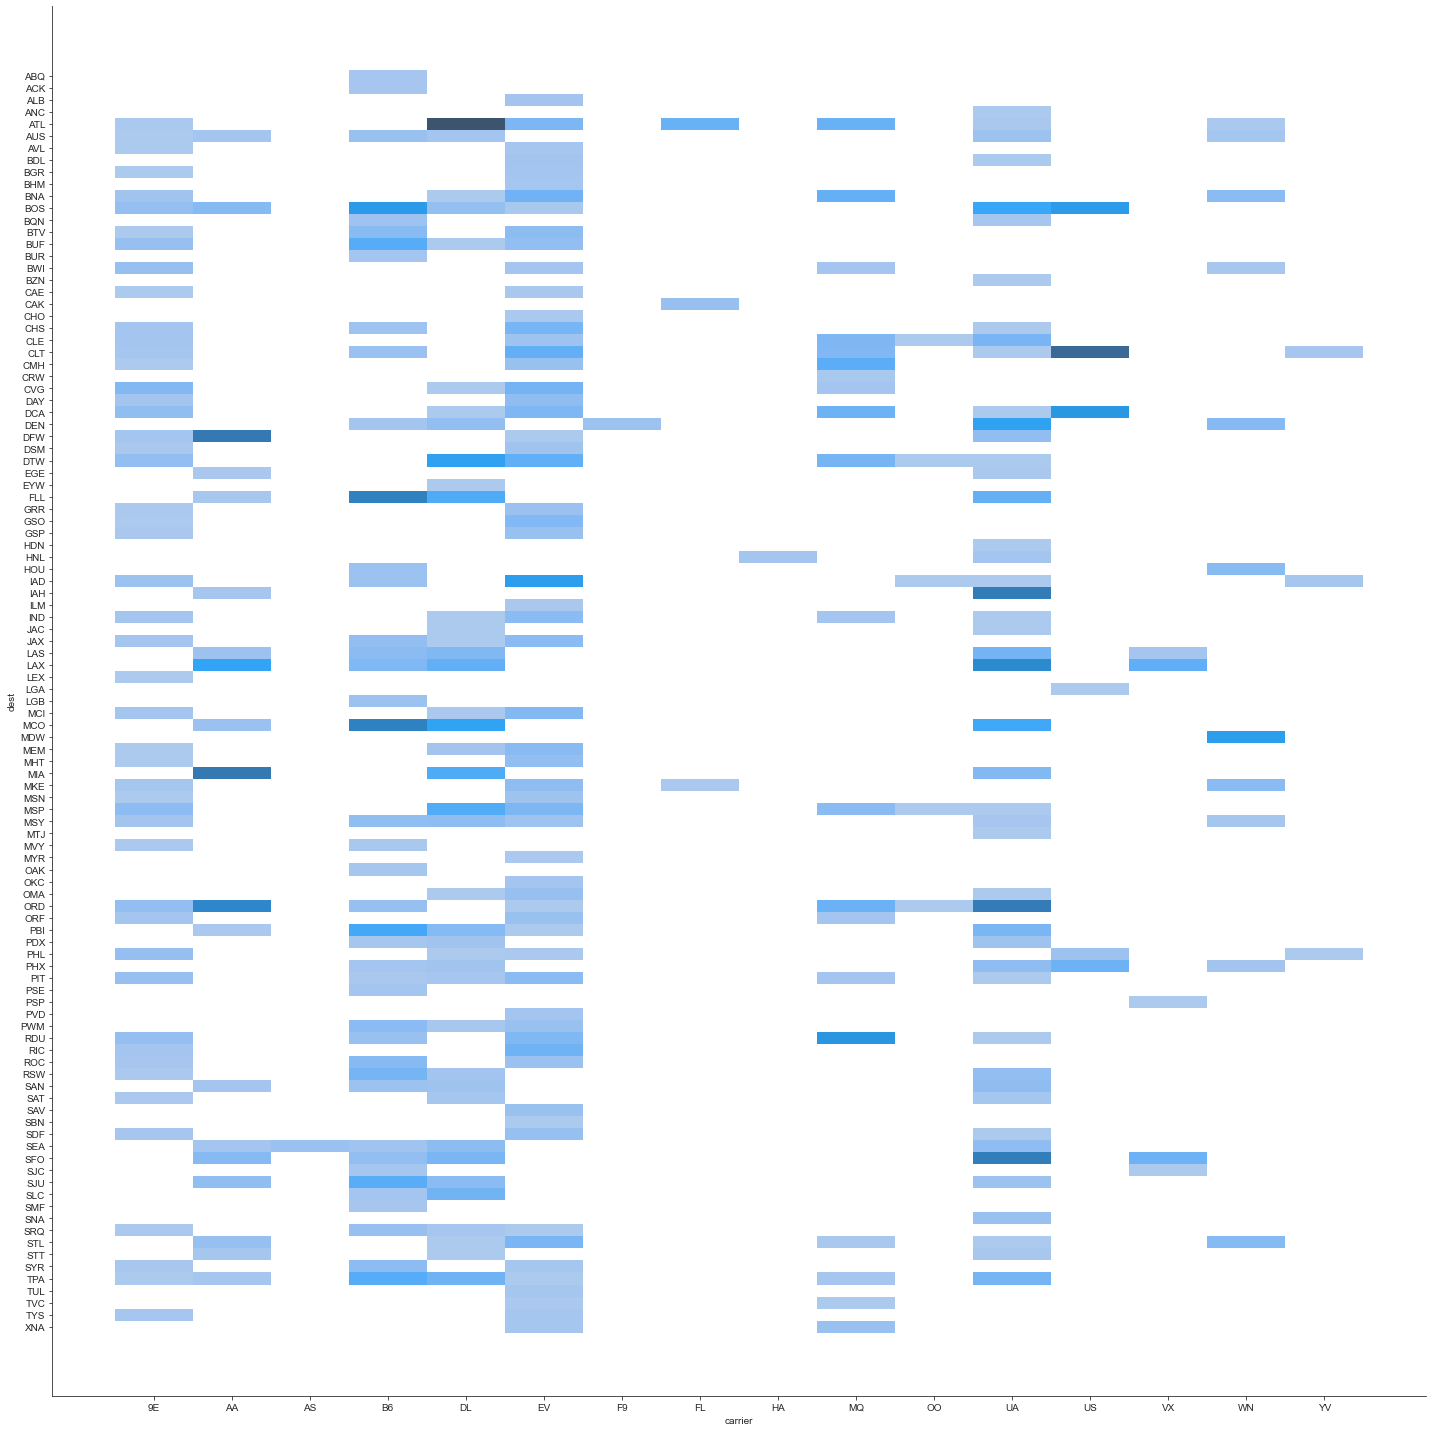

In [33]:
plot = sns.displot(flights, x="carrier", y="dest", cbar = False, height=20)
plot.ax.tick_params(labelrotation = 0)

###### Graph for Destination, Carrier and Origin

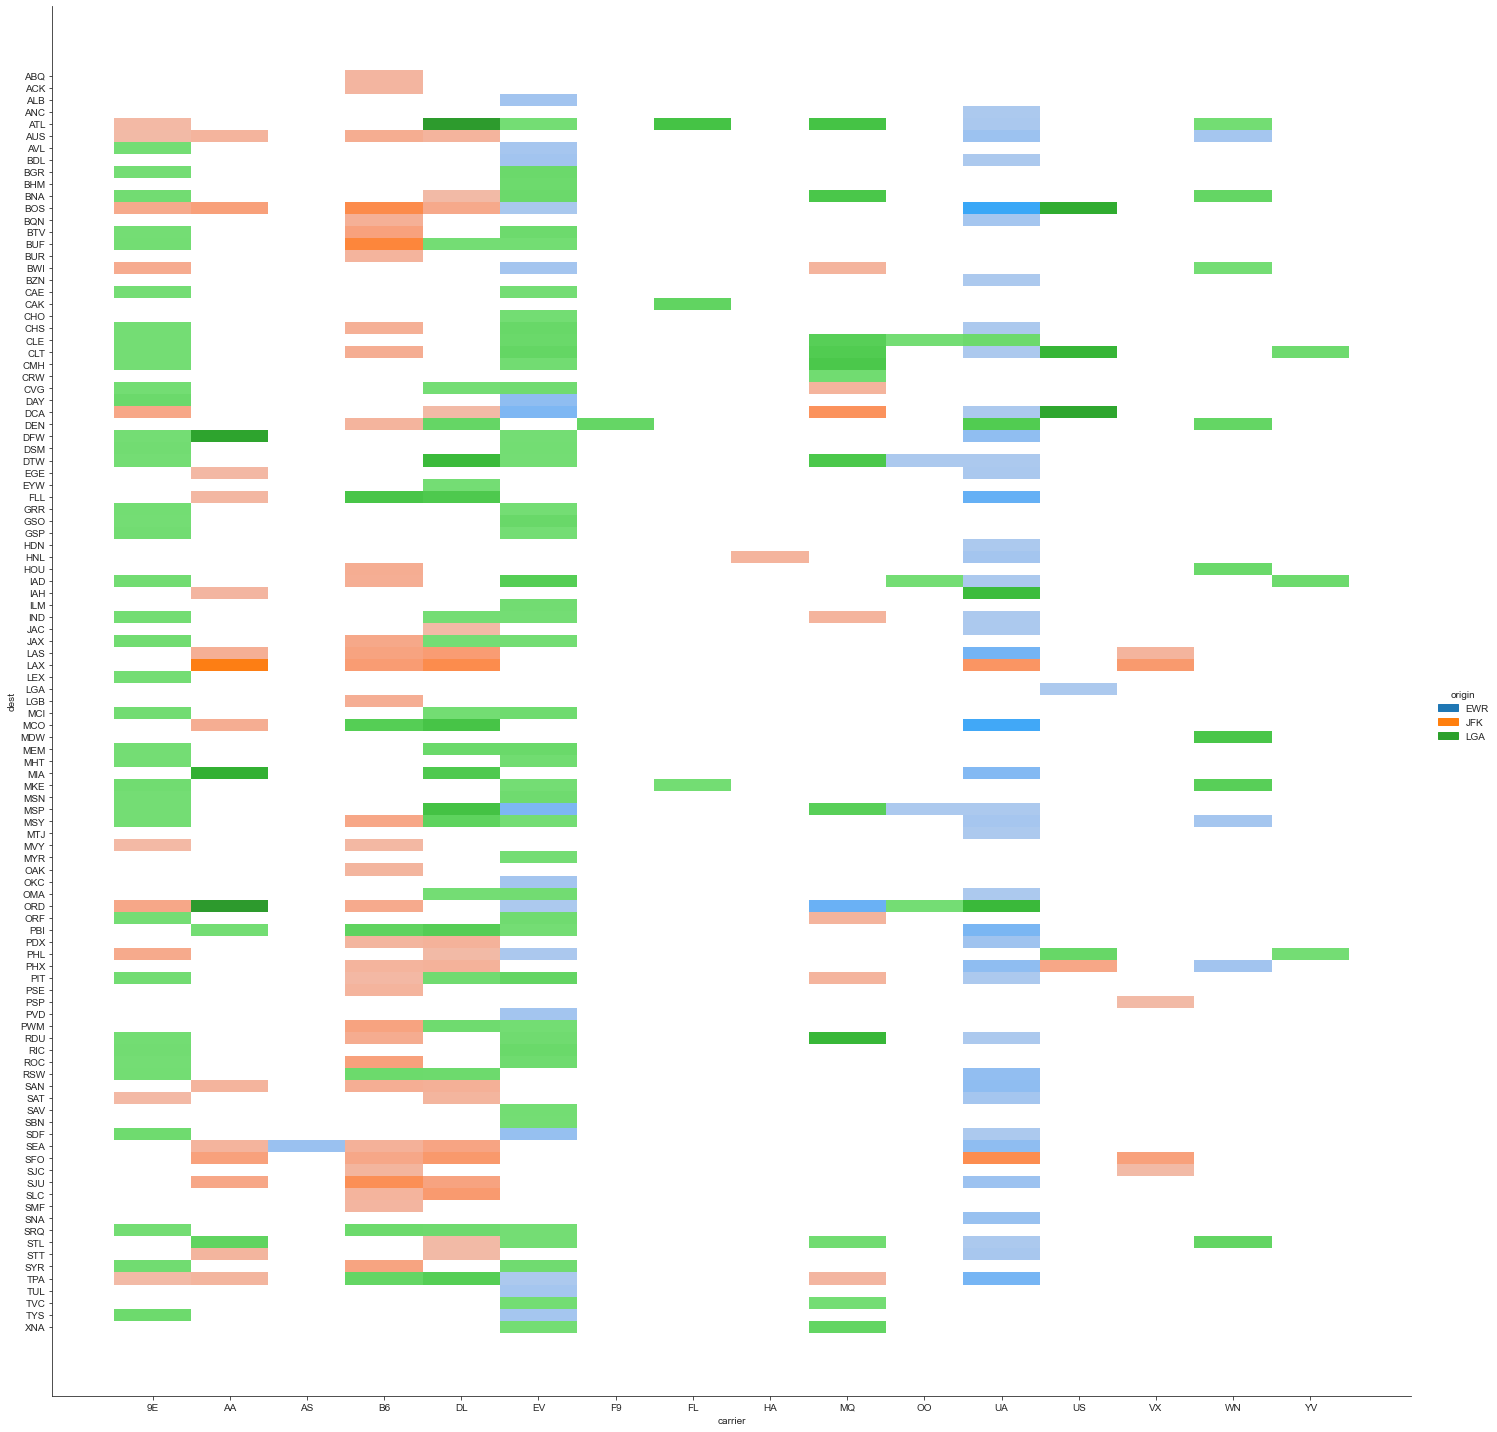

In [34]:
plot = sns.displot(flights, x="carrier", y="dest", hue= "origin", cbar = False, height=20)
plot.ax.tick_params(labelrotation = 0)

### Continuous to Continuous Variables

###### To check the relation between air time and distance

Text(0, 0.5, 'distance covered')

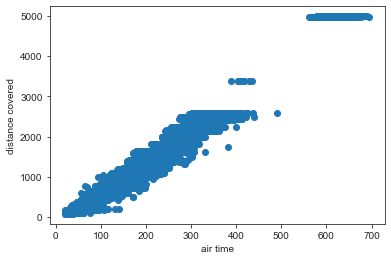

In [35]:
plt.scatter(data = flights, x="air_time", y="distance")
plt.xlabel('air time')
plt.ylabel('distance covered')

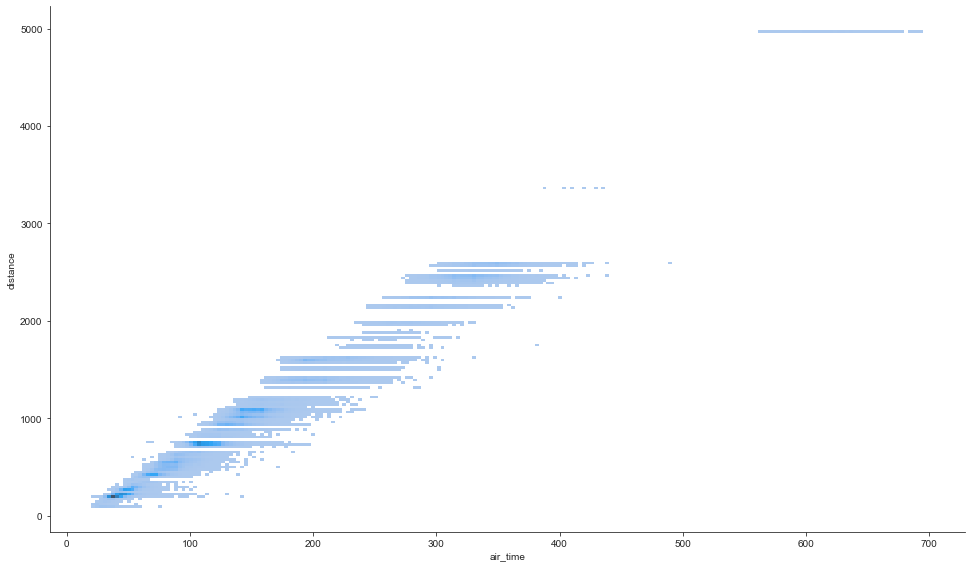

In [36]:
plot= sns.displot(data = flights, x="air_time", y="distance", height= 8, aspect= 1.7)

##### To check the relation between delay in arrival and delay in departure

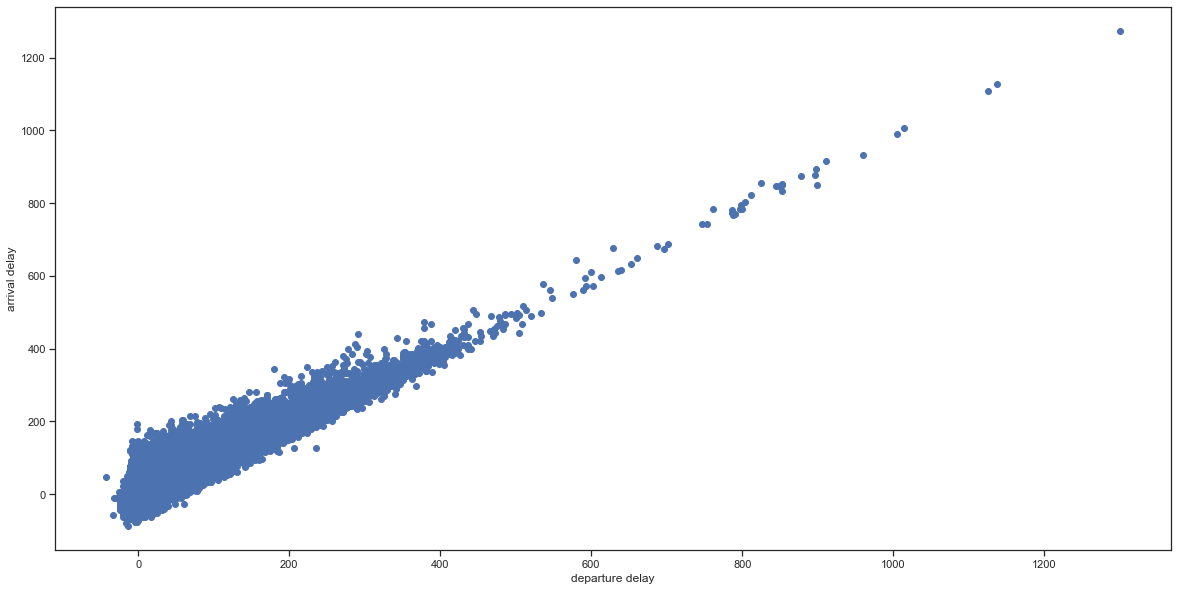

In [42]:
plt.scatter(data = flights, x="dep_delay", y="arr_delay")
plt.xlabel('departure delay')
plt.ylabel('arrival delay')
plt.figsize=(20,20)

### Categorical to Numerical varibles

###### To check the distance covered by each carrier

C:\Anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


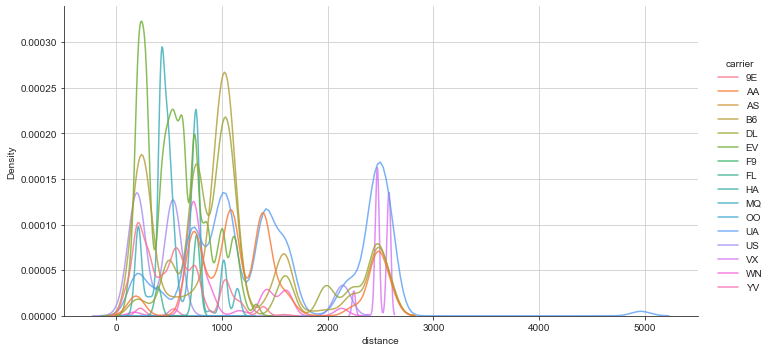

In [38]:
plot= sns.displot(data=flights, kind="kde", x="distance", hue = 'carrier', aspect=2, alpha=0.8)
plot.ax.grid()

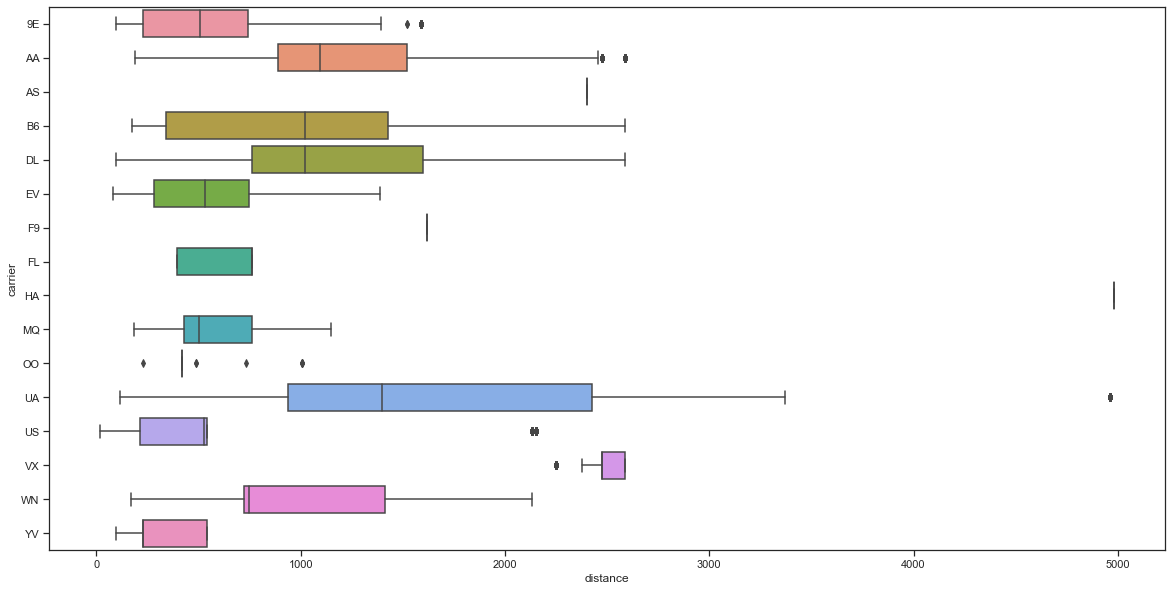

In [39]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.set_style('ticks')

plot = sns.boxplot(data= flights, x = 'distance', y = 'carrier')


In [40]:
sns.violinplot(data = flights, x= 'carrier', y = 'distance', aspect= 0.5, height=20)

<AxesSubplot:xlabel='carrier', ylabel='distance'>

###### Pair plot for each column

In [41]:
sns.pairplot(flights)

## Report

After performing EDA on flights dataset, following observations were done:

- Almost same amount of flights are departing from 3 origin airports
- UA carrier has the highest no. of flights whereas OO has the least no. of flights
- Most of the flights are scheduled to arrive between 10 AM - 12 PM and around 8 PM
- Most of the flights are scheduled to depart in early morning i.e 6 AM - 8 AM and from 2 PM to 7 PM
- F9 and FL carrier flight only departs from LGA.
- F9 carrier flights fly from LGA to DEN only
- HA carrier flights fly from JFK to HNL only
- Distance and air time are directly proportional
- With Departure delay, arrival delay tends to increase as well.
- UA has the longest flights whereas YV flights are shortest.